## Data Import

In [22]:
# Data
Emodb ="/content/DSER-MIDCA/data/EMODB/wav/"
Ravdess = "/content/DSER-MIDCA/data/RAVDESS/"
Iemocap = "/content/DSER-MIDCA/data/IEMOCAP_full_release"
Savee = "/content/DSER-MIDCA/data/SAVEE/AudioData/AudioData"

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



In [24]:


import os
list_files=[]
for dirname, _, filenames in os.walk('/content/DSER-MIDCA/data/IEMOCAP'):
    
    if "sentences/wav" not in dirname:
      continue
    print(dirname)
    for filename in filenames:
        if  ".wav" in filename :
          list_files.append(os.path.join(dirname, filename))
          # print(os.path.join(dirname, filename))
print(len(list_files))

/content/DSER-MIDCA/data/IEMOCAP/Session5/sentences/wav
/content/DSER-MIDCA/data/IEMOCAP/Session5/sentences/wav/Ses05M_script01_3
/content/DSER-MIDCA/data/IEMOCAP/Session5/sentences/wav/Ses05M_impro01
/content/DSER-MIDCA/data/IEMOCAP/Session5/sentences/wav/Ses05F_script02_2
/content/DSER-MIDCA/data/IEMOCAP/Session5/sentences/wav/Ses05F_script02_1
/content/DSER-MIDCA/data/IEMOCAP/Session5/sentences/wav/Ses05F_script01_2
/content/DSER-MIDCA/data/IEMOCAP/Session5/sentences/wav/Ses05F_script01_3
/content/DSER-MIDCA/data/IEMOCAP/Session5/sentences/wav/Ses05M_impro07
/content/DSER-MIDCA/data/IEMOCAP/Session5/sentences/wav/Ses05F_impro07
/content/DSER-MIDCA/data/IEMOCAP/Session5/sentences/wav/Ses05M_script03_1
/content/DSER-MIDCA/data/IEMOCAP/Session5/sentences/wav/Ses05F_impro04
/content/DSER-MIDCA/data/IEMOCAP/Session5/sentences/wav/Ses05M_impro04
/content/DSER-MIDCA/data/IEMOCAP/Session5/sentences/wav/Ses05M_impro05
/content/DSER-MIDCA/data/IEMOCAP/Session5/sentences/wav/Ses05M_impro08
/co

## IEMOCAP

In [87]:

csv_file = '/content/DSER-MIDCA/data/IEMOCAP/Documentation/iemocap_full_dataset.csv'

iemocap_df = pd.read_csv(csv_file)

iemocap_df.shape

(10039, 7)

In [88]:
iemocap_df.head()

,session,method,gender,emotion,n_annotators,agreement,path
0,1,script,F,neu,3,3,Session1/sentences/wav/Ses01F_script02_1/Ses01...
1,1,script,F,fru,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...
2,1,script,F,xxx,0,0,Session1/sentences/wav/Ses01F_script02_1/Ses01...
3,1,script,F,sur,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...
4,1,script,F,neu,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...


In [27]:
iemocap_df.head()

,session,method,gender,emotion,n_annotators,agreement,path
0,1,script,F,neu,3,3,Session1/sentences/wav/Ses01F_script02_1/Ses01...
1,1,script,F,fru,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...
2,1,script,F,xxx,0,0,Session1/sentences/wav/Ses01F_script02_1/Ses01...
3,1,script,F,sur,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...
4,1,script,F,neu,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...


In [89]:
iemocap_df=iemocap_df[iemocap_df["agreement"]>0]

In [90]:
iemocap_df.emotion.value_counts()

fru    1849
neu    1708
ang    1103
sad    1084
exc    1041
hap     595
sur     107
fea      40
oth       3
dis       2
Name: emotion, dtype: int64

In [91]:
emo_dict={"xxx":"xxx","fru":"frustration","neu":"neutral","ang":"angry","sad":"sad","exc":"excitement","hap":"happy","sur":"surprise","fea":"fear","oth":"other","dis":"disgust"}

In [92]:
iemocap_df["Emotions"]=iemocap_df.emotion.map(emo_dict)

In [93]:
iemocap_df["Emotions"].value_counts()

frustration    1849
neutral        1708
angry          1103
sad            1084
excitement     1041
happy           595
surprise        107
fear             40
other             3
disgust           2
Name: Emotions, dtype: int64

In [94]:
# dataframe for emotion of files
Iemocap_df = pd.DataFrame(iemocap_df, columns=['Emotions',"path"])

Iemocap_df.columns=['Emotions',"Path"]
Iemocap_df["Source"]="IEMOCAP"

In [95]:
Iemocap_df["Path"] =  "/content/DSER-MIDCA/data/IEMOCAP/"+Iemocap_df["Path"] 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


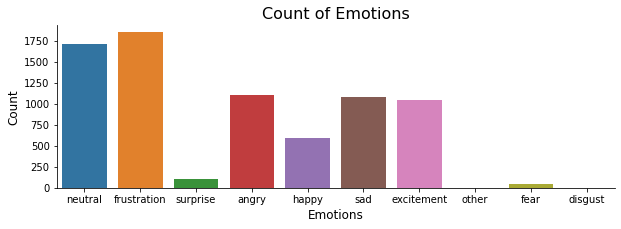

In [96]:
plt.figure(figsize=(10,3))
plt.title('Count of Emotions', size=16)

sns.countplot(Iemocap_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

## Ravdess

In [37]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)



In [38]:
Ravdess_df

,Emotions,Path
0,6,/content/DSER-MIDCA/data/RAVDESS/Actor_02/03-0...
1,5,/content/DSER-MIDCA/data/RAVDESS/Actor_02/03-0...
2,6,/content/DSER-MIDCA/data/RAVDESS/Actor_02/03-0...
3,5,/content/DSER-MIDCA/data/RAVDESS/Actor_02/03-0...
4,1,/content/DSER-MIDCA/data/RAVDESS/Actor_02/03-0...
...,...,...
1435,7,/content/DSER-MIDCA/data/RAVDESS/Actor_04/03-0...
1436,4,/content/DSER-MIDCA/data/RAVDESS/Actor_04/03-0...
1437,7,/content/DSER-MIDCA/data/RAVDESS/Actor_04/03-0...
1438,6,/content/DSER-MIDCA/data/RAVDESS/Actor_04/03-0...


In [39]:
# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df["Source"]="RAVDESS"
Ravdess_df.head()

,Emotions,Path,Source
0,fear,/content/DSER-MIDCA/data/RAVDESS/Actor_02/03-0...,RAVDESS
1,angry,/content/DSER-MIDCA/data/RAVDESS/Actor_02/03-0...,RAVDESS
2,fear,/content/DSER-MIDCA/data/RAVDESS/Actor_02/03-0...,RAVDESS
3,angry,/content/DSER-MIDCA/data/RAVDESS/Actor_02/03-0...,RAVDESS
4,neutral,/content/DSER-MIDCA/data/RAVDESS/Actor_02/03-0...,RAVDESS


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


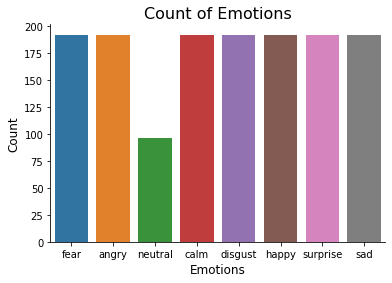

In [40]:
plt.title('Count of Emotions', size=16)
sns.countplot(Ravdess_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [41]:
Ravdess_df.Emotions.value_counts()

fear        192
angry       192
calm        192
disgust     192
happy       192
surprise    192
sad         192
neutral      96
Name: Emotions, dtype: int64

## SAVEE

In [162]:


savee_directory_list=os.listdir(Savee)

file_emotion = []
file_path = []

for folder in savee_directory_list:
    if "." in folder:
      continue
    file_directory_list = os.listdir(Savee + "/"+folder)
    for file in file_directory_list:
      
      
      os.rename(Savee + "/"+folder+"/"+file, Savee + "/"+folder+"/"+folder+"_"+file)
      file_path.append(Savee + "/"+folder+"/"+folder+"_"+file)
      ele = file[:-6]
      if ele=='a':
          file_emotion.append('angry')
      elif ele=='d':
          file_emotion.append('disgust')
      elif ele=='f':
          file_emotion.append('fear')
      elif ele=='h':
          file_emotion.append('happy')
      elif ele=='n':
          file_emotion.append('neutral')
      elif ele=='sa':
          file_emotion.append('sad')
      else:
          file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df["Source"]="SAVEE"
Savee_df.head()



,Emotions,Path,Source
0,happy,/content/DSER-MIDCA/data/SAVEE/AudioData/Audio...,SAVEE
1,neutral,/content/DSER-MIDCA/data/SAVEE/AudioData/Audio...,SAVEE
2,sad,/content/DSER-MIDCA/data/SAVEE/AudioData/Audio...,SAVEE
3,surprise,/content/DSER-MIDCA/data/SAVEE/AudioData/Audio...,SAVEE
4,angry,/content/DSER-MIDCA/data/SAVEE/AudioData/Audio...,SAVEE


In [163]:
Savee_df.Emotions.value_counts()

neutral     120
happy        60
sad          60
surprise     60
angry        60
fear         60
disgust      60
Name: Emotions, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


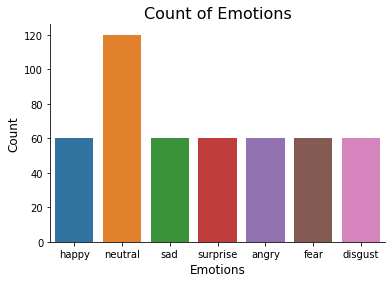

In [45]:
plt.title('Count of Emotions', size=16)
sns.countplot(Savee_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

## EMODB

In [46]:
berlin_directory_list = os.listdir(Emodb)

file_emotion = []
file_path = []

for file in berlin_directory_list:
    file_path.append(Emodb + file)
    
    ele = file[5]
    if ele=='W':
        file_emotion.append('angry')
    elif ele=='E':
        file_emotion.append('disgust')
    elif ele=='A':
        file_emotion.append('fear')
    elif ele=='F':
        file_emotion.append('happy')
    elif ele=='N':
        file_emotion.append('neutral')
    elif ele=='L'or ele=='T':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Berlin_df = pd.concat([emotion_df, path_df], axis=1)
Berlin_df["Source"]="EMODB"
Berlin_df.head(10)

,Emotions,Path,Source
0,angry,/content/DSER-MIDCA/data/EMODB/wav/11b03Wa.wav,EMODB
1,angry,/content/DSER-MIDCA/data/EMODB/wav/16a04Wb.wav,EMODB
2,sad,/content/DSER-MIDCA/data/EMODB/wav/16b03Ta.wav,EMODB
3,sad,/content/DSER-MIDCA/data/EMODB/wav/10a05Tb.wav,EMODB
4,fear,/content/DSER-MIDCA/data/EMODB/wav/14b10Ad.wav,EMODB
5,happy,/content/DSER-MIDCA/data/EMODB/wav/13b03Fd.wav,EMODB
6,angry,/content/DSER-MIDCA/data/EMODB/wav/11b01Wd.wav,EMODB
7,happy,/content/DSER-MIDCA/data/EMODB/wav/11a05Fc.wav,EMODB
8,sad,/content/DSER-MIDCA/data/EMODB/wav/14b09Lb.wav,EMODB
9,sad,/content/DSER-MIDCA/data/EMODB/wav/08a02Tb.wav,EMODB


In [47]:
Berlin_df.Emotions.value_counts()

sad        143
angry      127
neutral     79
happy       71
fear        69
disgust     46
Name: Emotions, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


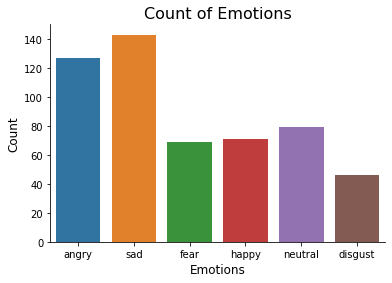

In [48]:
plt.title('Count of Emotions', size=16)
sns.countplot(Berlin_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [164]:
final_df =pd.concat([Iemocap_df,
Ravdess_df,
Savee_df,
Berlin_df])
final_df.Emotions.value_counts()


neutral        2003
frustration    1849
angry          1482
sad            1479
excitement     1041
happy           918
fear            361
surprise        359
disgust         300
calm            192
other             3
Name: Emotions, dtype: int64

In [165]:
final_df

,Emotions,Path,Source
0,neutral,/content/DSER-MIDCA/data/IEMOCAP/Session1/sent...,IEMOCAP
1,frustration,/content/DSER-MIDCA/data/IEMOCAP/Session1/sent...,IEMOCAP
3,surprise,/content/DSER-MIDCA/data/IEMOCAP/Session1/sent...,IEMOCAP
4,neutral,/content/DSER-MIDCA/data/IEMOCAP/Session1/sent...,IEMOCAP
6,angry,/content/DSER-MIDCA/data/IEMOCAP/Session1/sent...,IEMOCAP
...,...,...,...
530,angry,/content/DSER-MIDCA/data/EMODB/wav/15a02Wb.wav,EMODB
531,sad,/content/DSER-MIDCA/data/EMODB/wav/09a05Lc.wav,EMODB
532,sad,/content/DSER-MIDCA/data/EMODB/wav/15b09La.wav,EMODB
533,happy,/content/DSER-MIDCA/data/EMODB/wav/14a02Fd.wav,EMODB


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


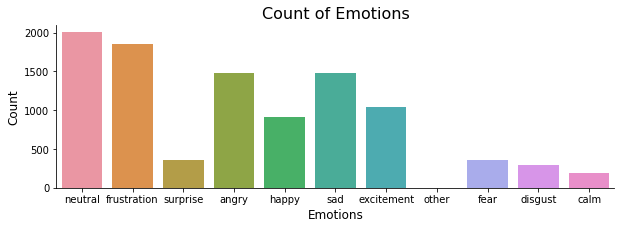

In [99]:
plt.figure(figsize=(10,3))
plt.title('Count of Emotions', size=16)
sns.countplot(final_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False,)
plt.show()

In [100]:
common_emotions=list(set(Iemocap_df.Emotions)&set(Ravdess_df.Emotions)&set(Savee_df.Emotions)&set(Berlin_df.Emotions))

In [101]:
df_common=final_df[final_df["Emotions"].isin(common_emotions)]

In [102]:
df_count=df_common[["Source","Emotions"]].value_counts().reset_index()
df_count.columns=["Source","Emotions","EmotionCount"]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


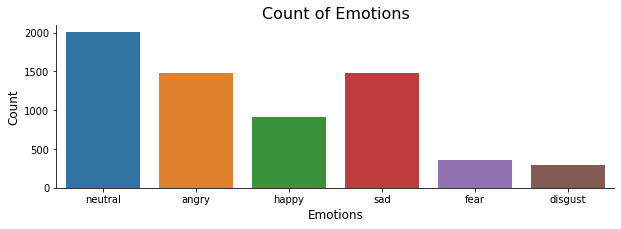

In [103]:
plt.figure(figsize=(10,3))
plt.title('Count of Emotions', size=16)
sns.countplot(df_common.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False,)
plt.show()

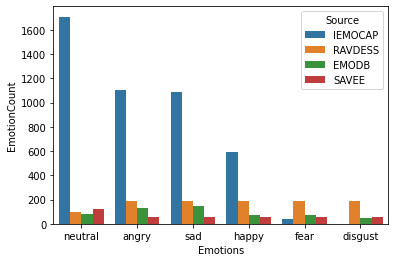

In [104]:
sns.barplot(data=df_count,x="Emotions",y="EmotionCount",hue="Source")